<a href="https://colab.research.google.com/github/sandovalmedeiros/PythonGeo/blob/main/Semana_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ELT574 - Aprendizado de Máquinas**
**Curso de Especialização em Inteligência Artificial e Computacional**



## Semana 3 - Redes Neurais Artificiais

Preparação do ambiente de programação e importação das principais bibliotecas.

In [ ]:
#Importando as bibliotecas para análise do problema e configurando o notebook

## OS para executar comandos de diretorio
import os

## Habilitar Google Drive no Colab
# from google.colab import drive
# drive.mount('/content/drive')

## NumPy para manipular matrizes e vetores
import numpy as np

## Pandas para manipular os dataframes
import pandas as pd

## Plotar figuras bonitas
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
import seaborn as sns

print('Setup completo!')

Setup completo!


### Aula 01 e 02 - Introdução às Redes Neurais Artificiais -- Perceptron e Adaline

#### Perceptron

*Classificar as espécies de flores de íris.* Uma das classes é linearmente separável das outras duas classes. Estas últimas não são linearmente separáveis.

Fonte: https://archive.ics.uci.edu/ml/datasets/iris

In [ ]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

*Variáveis do banco de dados:*

1. petal length in cm
2. petal width in cm
3. class:
  - Iris Setosa (0)
  - Iris Versicolour (1)



In [ ]:
from sklearn.linear_model import Perceptron

per_clf = Perceptron(max_iter=1000, tol=1e-3, random_state=42)
#max_iter = epoca_max; tol = limiar de precisao; random_state = sempre os mesmos pesos no sorteio
per_clf.fit(X, y)
print('Perceptron treinado!')
print('Os pesos encontrados foram {} e o bias foi {}.'.format(per_clf.coef_, per_clf.intercept_))

y_pred = per_clf.predict([[2, 0.5]])
y_pred

Perceptron treinado!
Os pesos encontrados foram [[1.5 2.2]] e o bias foi [-5.].


array([0])

Perceptron treinado!
Os pesos encontrados foram [[0.9 1.7]] e o bias foi [-3.].


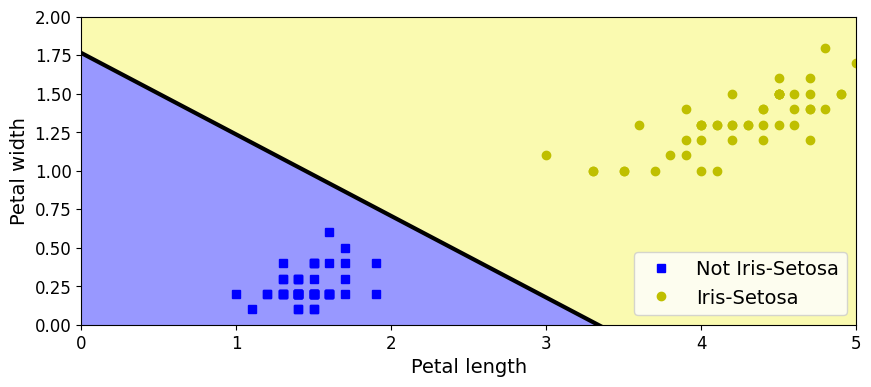

In [ ]:
per_clf = Perceptron(max_iter=2000, tol=1e-3)
#max_iter = epoca_max; tol = limiar de precisao
per_clf.fit(X, y)
print('Perceptron treinado!')
print('Os pesos encontrados foram {} e o bias foi {}.'.format(per_clf.coef_, per_clf.intercept_))

a = -per_clf.coef_[0][0] / per_clf.coef_[0][1]
b = -per_clf.intercept_ / per_clf.coef_[0][1]

axes = [0, 5, 0, 2]

x0, x1 = np.meshgrid(
        np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
        np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
y_predict = per_clf.predict(X_new)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs", label="Not Iris-Setosa")
plt.plot(X[y==1, 0], X[y==1, 1], "yo", label="Iris-Setosa")

plt.plot([axes[0], axes[1]], [a * axes[0] + b, a * axes[1] + b], "k-", linewidth=3)
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#9898ff', '#fafab0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="lower right", fontsize=14)
plt.axis(axes)

plt.show()

### Aula 03 - Redes perceptron multicamadas (classificação)

Construindo modelos de rede perceptron multicamadas com a biblioteca Keras do TensorFlow

In [ ]:
import tensorflow as tf
from tensorflow import keras

##### Classificador de imagens com Keras

Vamos utilizar o dataset fashion MNIST. O MNIST é um dataset de imagens para problemas de classificação multiclasse.

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist

Este dataset já contem os dados de treinamento e teste separados. O dataset de treinamento é composto por 60.000 imagens com 28x28 pixels.

In [ ]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()
X_train_full.shape

4422102/4422102 [==============================] - 0s 0us/step


(60000, 28, 28)

Já o dataset de teste é composto por 10.000 imagens de 28x28 pixels.

In [ ]:
X_test.shape

(10000, 28, 28)

Cada pixel das imagens é representado por um valor em escala de cinza, que vai de 0 a 255. O tipo das entradas é inteira, sem sinal, de 8 bits.

In [ ]:
X_train_full.dtype

dtype('uint8')

###### Separando os dados para validação durante o treinamento

Vamos dividir o dataset de treinamento para separmos um conjunto de validação que será utilizado durante o treinamento. Como o valor máximo de cada pixel pode ser 255, vamos normalizar o valor dos pixels para um valor float entre 0 e 1.

In [ ]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255. #o ponto em 255. caracteriza a conversao para float
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

Podemos plotar as imagens do dataset utilizando o `imshow()` da biblioteca `matplotlib` com a cor em escala de cinza (mapeamento binário, `'binary'`).





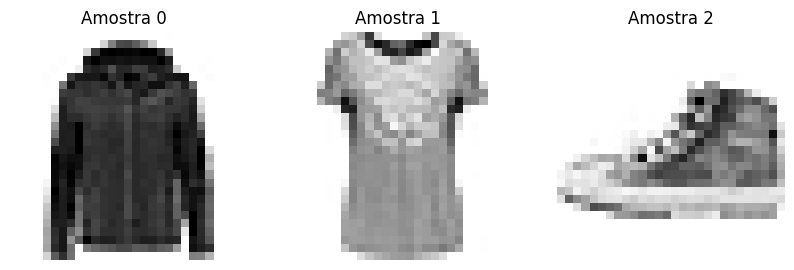

In [ ]:
plt.figure(figsize=(10,4))
plt.subplot(131)
plt.imshow(X_train[0], cmap="binary")
plt.title('Amostra 0')
plt.axis('off')

plt.subplot(132)
plt.imshow(X_train[1], cmap="binary")
plt.title('Amostra 1')
plt.axis('off')

plt.subplot(133)
plt.imshow(X_train[2], cmap="binary")
plt.title('Amostra 2')
plt.axis('off')
plt.show()

Repare abaixo que os valores armazenados para o rótulo das classes são valores numéricos. Cada classe possui um número que representa:

0. T-shirt/top
1. Trouser
2. Pullover
3. Dress
4. Coat
5. Sandal
6. Shirt
7. Sneaker
8. Bag
9. Ankle boot




In [ ]:
print(y_train)
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

[4 0 7 ... 3 0 5]


Sendo assim, a primeira imagem do dataset de treinamento é:

In [ ]:
class_names[y_train[0]]

'Coat'

Algumas das imagens do dataset de treinamento:

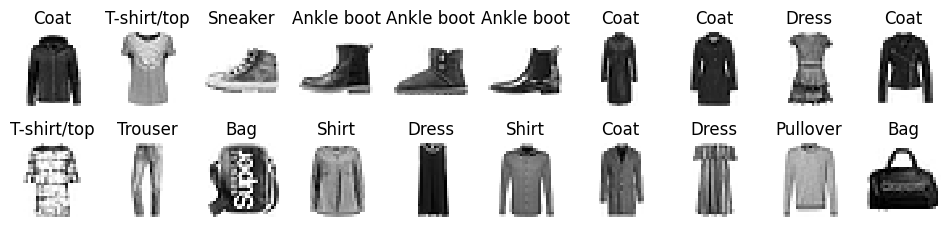

In [ ]:
n_rows = 2
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

###### Criando o modelo de PMC

Vamos criar um modelo de PMC para classificar as amostras! Como é um problema com imagens, vamos ajustar uma rede com duas camadas escondidas.

In [ ]:
# Criando o modelo de PMC
## Declaracao do modelo sequencial para o Keras
model = keras.models.Sequential()
## Camada de entrada (flatten transforma a imagem 28x28 em um vetor 1D de 784 valores)
model.add(keras.layers.Flatten(input_shape=[28, 28]))
## Primeira camada escondida, com 300 neuronios e funcao de ativacao ReLU;
### Cada camada 'Dense' gerencia seus proprios parametros, incluindo bias
model.add(keras.layers.Dense(300, activation="relu"))
## Segunda camada escondida, com 100 neuronios e ReLU
model.add(keras.layers.Dense(100, activation="relu"))
## Camada de saida com 10 neuronios e funcao de ativacao softmax (multiclasse)
model.add(keras.layers.Dense(10, activation="softmax"))

Outra maneira de declarar o modelo sequencial com Keras poderia ser:

In [ ]:
model = keras.models.Sequential([
  keras.layers.Flatten(input_shape=[28, 28]),
  keras.layers.Dense(300, activation="relu"),
  keras.layers.Dense(100, activation="relu"),
  keras.layers.Dense(10, activation="softmax")
])

A estrutura do modelo pode ser verificada por:

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 300)               235500    
                                                                 
 dense_4 (Dense)             (None, 100)               30100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


E as camadas do modelo por:

In [ ]:
model.layers

Podemos atribuir uma camada a uma variável para manipular os parâmetros da camada.

In [ ]:
hidden1 = model.layers[1]
hidden1

Os parâmetros de cada camada podem ser acessados e alterados com os métodos `get_weights()` e `set_weights()`

In [ ]:
weights, biases = hidden1.get_weights()
weights

array([[ 0.00734661,  0.0687453 , -0.07035632, ...,  0.037182  ,
        -0.05203992, -0.01906756],
       [-0.03030026,  0.05693251,  0.00662945, ...,  0.03327528,
        -0.03534821,  0.0020868 ],
       [ 0.02315379,  0.03939325,  0.00555161, ..., -0.02920289,
         0.01096923, -0.04441094],
       ...,
       [ 0.05231996, -0.04066034,  0.05371803, ..., -0.05626515,
        -0.02603486, -0.0143664 ],
       [-0.05839214,  0.01258653, -0.02341375, ...,  0.04094946,
        -0.00265037, -0.07097916],
       [-0.06061308, -0.06479061, -0.00652095, ..., -0.00107872,
         0.06920026, -0.02510653]], dtype=float32)

In [ ]:
weights.shape

(784, 300)

In [ ]:
biases.shape

(300,)

A finalização do modelo é feita compilando as últimas informações que devem ser repassadas à estrutura do PMC, a função de otimização, o otimizador e o indicador de métrica.

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

A função de otimização `'sparse_categorical_crossentropy'` é utilizada porque cada saída está rolutada de 0 a 9. Se fosse um vetor dummy (`[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]`), poderíamos utilizar a função `'categorical_crossentropy'`.

Se fosse um problema de classificação binária, utilizaríamos a função `'binary_crossentropy'` e a função de ativação `'sigmoid'` como função de ativação na camada de saída.

###### Treinando o modelo de PMC

O treinamento do modelo é feito utilizando o método `'fit()'` para a classe model.

In [ ]:
history = model.fit(X_train,y_train, epochs=30,
                    validation_data=(X_valid,y_valid))

Epoch 1/30
1719/1719 [==============================] - 15s 8ms/step - loss: 0.7109 - accuracy: 0.7658 - val_loss: 0.5010 - val_accuracy: 0.8346
Epoch 2/30
1719/1719 [==============================] - 16s 9ms/step - loss: 0.4881 - accuracy: 0.8302 - val_loss: 0.4617 - val_accuracy: 0.8460
Epoch 3/30
1719/1719 [==============================] - 12s 7ms/step - loss: 0.4423 - accuracy: 0.8454 - val_loss: 0.4147 - val_accuracy: 0.8560
Epoch 4/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4149 - accuracy: 0.8559 - val_loss: 0.3911 - val_accuracy: 0.8694
Epoch 5/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3956 - accuracy: 0.8617 - val_loss: 0.3921 - val_accuracy: 0.8690
Epoch 6/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3803 - accuracy: 0.8654 - val_loss: 0.4023 - val_accuracy: 0.8584
Epoch 7/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3668 - accuracy: 0.8698 - val_loss: 0.3683 - val_accura

Outra forma de dividir o dataset para treinamento e validação (ao invés de usar o argumento `validation_data`) é utilizar o argumento `validation_split=0.1` para passar a quantidade de dados que devem ser utilizados para a validação durante a fase de treinamento.

###### Analisando os resultados do treinamento

O treinamento do modelo armazenou o histórico de todas as épocas no dicionário `history`. Podemos transformar este dicionário em um DataFrame do Pandas e manipular os dados dele para identificar o melhor modelo treinado.

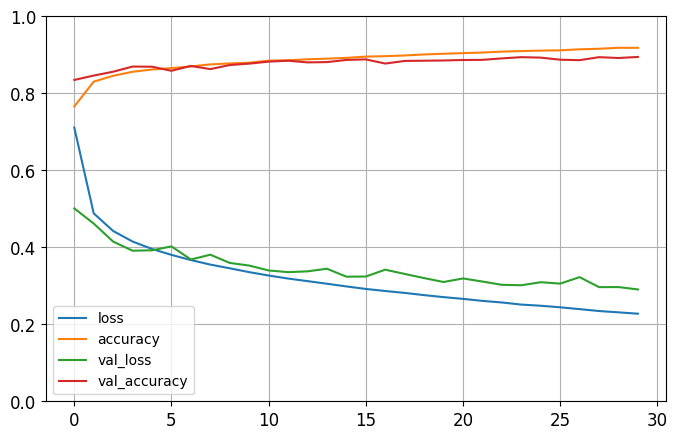

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1) # ajusta o eixo y para os limites de 0 a 1
plt.show()

Conseguimos um bom desempenho com este modelo e sem uma tendência de overfitting. Podemos ver isto porque o `loss` e o `val_loss`continuam diminuindo, apesar do `val_loss` estar com uma inclinação quase nula no final da última época treinada. Se o modelo continuasse o ajuste dos parâmetros, o `loss` continuaria descendo, mas, provavelmente, o `val_accuraccy` deixaria de acompanhar o `accuraccy` de treinamento.

Se o comportamento do modelo não foi satisfatório ainda depois do treinamento, podemos alterar os hiperparâmetros de treinamento, começando pela taxa de aprendizagem, o otimizador, número de camadas, número de neurônios por camada e os tipos de função de ativação.

Uma vez satisfeito com o modelo, podemos utilizar o dataset de teste para verificar mais uma vez o desempenho do PMC.

In [ ]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3213 - accuracy: 0.8860


[0.32126402854919434, 0.8859999775886536]

###### Utilizando o modelo para fazer predições

Acertado o modelo, podemos começar a fazer predições para aplicação. Vamos tomar algumas amostras do dataset de teste para verificar as predições.

In [ ]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 103ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.  , 0.98],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [ ]:
list(y_test[:3])

[9, 2, 1]

In [ ]:
y_pred = np.argmax(y_proba,axis=1)
y_pred

array([9, 2, 1])

In [ ]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [ ]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

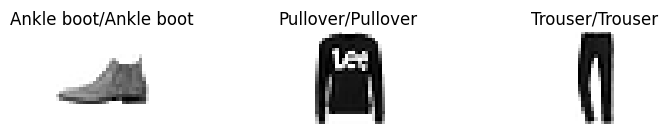

In [ ]:
n_rows = 1
n_cols = 3
plt.figure(figsize=(n_cols * 3, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_test[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_test[index]] + '/' + class_names[y_pred[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()



---


---



---




---



---



---



---



### Aula 04 - Redes perceptron multicamadas (regressão)
##### Regressor com Keras

Vamos fazer a estimação do preço das casas das vizinhanças da Califórnia. Este banco de dados já está limpo e sem as variáveis categóricas.

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

Separando os dados entre dataset de treinamento e teste.

In [ ]:
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full)

Pré-processamento dos dados (padronização)

In [ ]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_valid = scaler.fit_transform(X_valid)
X_test = scaler.fit_transform(X_test)

Vamos utilizar a API sequencial para construir, treinar, avaliar e usar a PMC de regressão, assim como fizemos na PMC de classificação. A diferença é que na camada de saída haverá apenas um neurônio, referente à variável do preço estimado.

In [ ]:
import tensorflow as tf
from tensorflow import keras

model = keras.models.Sequential([
  keras.layers.Dense(20, activation='relu', input_shape=X_train.shape[1:]), #camada de entrada
  keras.layers.Dense(1) # camada de saida
])
model.compile(loss='mean_squared_error', optimizer = 'sgd')

Treinando o modelo de PMC

In [ ]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid,y_valid))
mse_test = model.evaluate(X_test,y_test)

Epoch 1/30
363/363 [==============================] - 1s 2ms/step - loss: 1.0491 - val_loss: 0.7636
Epoch 2/30
363/363 [==============================] - 1s 3ms/step - loss: 0.6019 - val_loss: 0.5882
Epoch 3/30
363/363 [==============================] - 1s 3ms/step - loss: 0.5105 - val_loss: 0.8268
Epoch 4/30
363/363 [==============================] - 1s 2ms/step - loss: 0.6791 - val_loss: 0.9449
Epoch 5/30
363/363 [==============================] - 1s 2ms/step - loss: 0.5168 - val_loss: 0.5148
Epoch 6/30
363/363 [==============================] - 1s 2ms/step - loss: 0.4415 - val_loss: 0.4840
Epoch 7/30
363/363 [==============================] - 1s 2ms/step - loss: 0.4261 - val_loss: 0.4760
Epoch 8/30
363/363 [==============================] - 1s 2ms/step - loss: 0.4152 - val_loss: 0.4684
Epoch 9/30
363/363 [==============================] - 1s 2ms/step - loss: 0.4066 - val_loss: 0.4639
Epoch 10/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3995 - val_loss: 0.4574

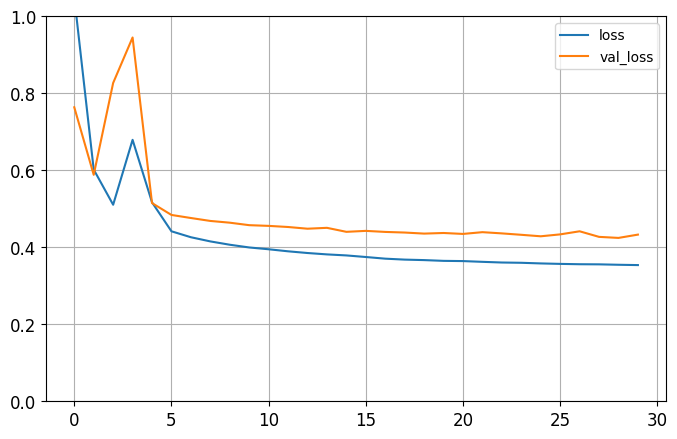

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1) # ajusta o eixo y para os limites de 0 a 1
plt.show()

Estimando o valor de algumas amostras não apresentadas durante o treinamento

162/162 [==============================] - 0s 1ms/step


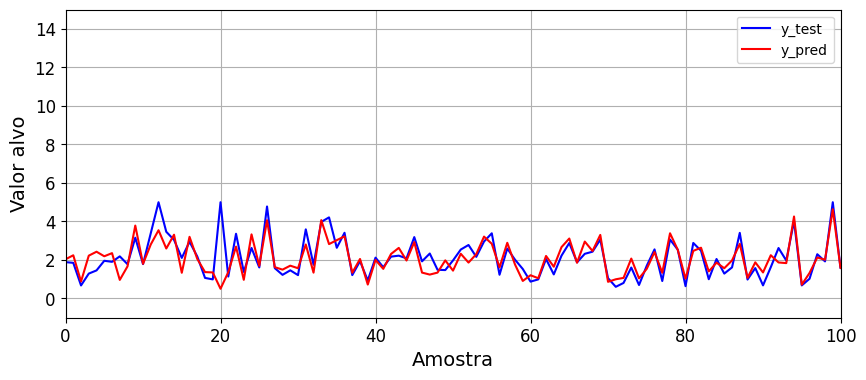

In [ ]:
y_pred = model.predict(X_test)

plt.figure(figsize=(10, 4))
plt.grid(True)
plt.plot(range(0,len(y_test)),y_test, "b", label="y_test")
plt.plot(range(0,len(y_pred)),y_pred, "r", label="y_pred")
plt.axis([0, 100, -1, 15])
plt.xlabel("Amostra")
plt.ylabel("Valor alvo")
plt.legend()

plt.show()

##### Busca dos melhores parâmetros para uma rede PMC

A quantidade de parâmetros para ser ajustado é a vantagem e a desvantagem das redes neurais. Por um lado, temos muitos parâmetros para ajustar o modelo da melhor forma aos dados. Por outro lado, existem muitas possibilidades para ajustar o modelo. Podemos fazer uma busca dos melhores parâmetros por meio do algoritmo de treinamento, sem precisar ajustar tudo manualmente.

In [ ]:
import tensorflow as tf
from tensorflow import keras

# Criando uma classe para representar o modelo que sera treinado

def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
  model = keras.models.Sequential()
  model.add(keras.layers.InputLayer(input_shape=input_shape))
  for layer in range(n_hidden):
    model.add(keras.layers.Dense(n_neurons, activation='relu'))
  model.add(keras.layers.Dense(1))
  optimizer = keras.optimizers.SGD(lr=learning_rate)
  model.compile(loss='mse', optimizer=optimizer)
  return model

Criando um regressor baseado na classe que foi definida.

In [ ]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

keras_reg.fit(X_train, y_train, epochs=100,
              validation_data=(X_valid,y_valid),
              callbacks=[keras.callbacks.EarlyStopping(patience=10)] # parada precipitada para evitar overfitting. patience=10 deixa ate 10 epocas sem melhora no indicador de desempenho ('val_loss')
              )



<ipython-input-41-f310f0447ded>:1: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)


Epoch 1/100
363/363 [==============================] - 1s 2ms/step - loss: 0.7883 - val_loss: 0.7261
Epoch 2/100
363/363 [==============================] - 1s 2ms/step - loss: 0.9603 - val_loss: 0.5972
Epoch 3/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4674 - val_loss: 0.4949
Epoch 4/100
363/363 [==============================] - 1s 3ms/step - loss: 0.4226 - val_loss: 0.4715
Epoch 5/100
363/363 [==============================] - 1s 3ms/step - loss: 0.4106 - val_loss: 0.4617
Epoch 6/100
363/363 [==============================] - 1s 3ms/step - loss: 0.4013 - val_loss: 0.4537
Epoch 7/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3945 - val_loss: 0.4567
Epoch 8/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3893 - val_loss: 0.4452
Epoch 9/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3849 - val_loss: 0.4547
Epoch 10/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3807 - val_lo

In [ ]:
mse_test = keras_reg.score(X_test,y_test)

162/162 [==============================] - 0s 1ms/step - loss: 0.3421


In [ ]:
X_new = X_test[:10]
y_pred = keras_reg.predict(X_new)
y_pred

1/1 [==============================] - 0s 51ms/step


array([2.0238981, 2.1259437, 0.7640009, 2.0487237, 2.3995502, 1.9895241,
       2.410913 , 0.8566432, 1.7568092, 3.627868 ], dtype=float32)

Agora já temos uma classe para ser treinada toda vez que for chamada. Precisamos definir quais hiperparâmetros serão alterados para encontrar a melhor configuração de rede PMC. Este processo pode levar algum tempo, não se preocupe (talvez horas).

In [ ]:
import numpy as np
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV # implementa a k-fold cross-validation

param_distribs = {
    "n_hidden": [0, 1, 2, 3],
    "n_neurons": np.arange(1,100),
    "learning_rate": reciprocal(3e-4, 3e-2),
}

rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3)
rnd_search_cv.fit(X_train, y_train, epochs=100,
                  validation_data=(X_valid,y_valid),
                  callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Epoch 1/100
242/242 [==============================] - 1s 3ms/step - loss: 0.7970 - val_loss: 0.5831
Epoch 2/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4793 - val_loss: 0.4879
Epoch 3/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4291 - val_loss: 0.5353
Epoch 4/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4025 - val_loss: 0.4933
Epoch 5/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3904 - val_loss: 0.4480
Epoch 6/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3640 - val_loss: 0.4396
Epoch 7/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3605 - val_loss: 0.4327
Epoch 8/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3491 - val_loss: 0.4562
Epoch 9/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3453 - val_loss: 0.4272
Epoch 10/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3405 - val_lo

Epoch 1/100
242/242 [==============================] - 1s 4ms/step - loss: 0.8287 - val_loss: 0.6747
Epoch 2/100
242/242 [==============================] - 1s 3ms/step - loss: 0.6269 - val_loss: 0.6302
Epoch 3/100
242/242 [==============================] - 1s 3ms/step - loss: 0.5138 - val_loss: 0.5049
Epoch 4/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4549 - val_loss: 0.4665
Epoch 5/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3967 - val_loss: 0.4446
Epoch 6/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3818 - val_loss: 0.4361
Epoch 7/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3744 - val_loss: 0.4334
Epoch 8/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3667 - val_loss: 0.4283
Epoch 9/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3608 - val_loss: 0.4368
Epoch 10/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3576 - val_lo

Epoch 1/100
242/242 [==============================] - 2s 4ms/step - loss: 0.9164 - val_loss: 0.9325
Epoch 2/100
242/242 [==============================] - 1s 4ms/step - loss: 0.7717 - val_loss: 0.5035
Epoch 3/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4360 - val_loss: 0.4751
Epoch 4/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4044 - val_loss: 0.4530
Epoch 5/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3867 - val_loss: 0.4412
Epoch 6/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3771 - val_loss: 0.4455
Epoch 7/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3700 - val_loss: 0.4358
Epoch 8/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3734 - val_loss: 0.4286
Epoch 9/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3582 - val_loss: 0.4253
Epoch 10/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3519 - val_lo

Epoch 1/100
242/242 [==============================] - 1s 2ms/step - loss: 1.2877 - val_loss: 0.6375
Epoch 2/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5645 - val_loss: 0.5886
Epoch 3/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5234 - val_loss: 0.5778
Epoch 4/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5270 - val_loss: 0.5616
Epoch 5/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5169 - val_loss: 0.5541
Epoch 6/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5152 - val_loss: 0.5760
Epoch 7/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5137 - val_loss: 0.5543
Epoch 8/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5114 - val_loss: 0.5489
Epoch 9/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5111 - val_loss: 0.5801
Epoch 10/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5121 - val_lo

Epoch 1/100
242/242 [==============================] - 1s 3ms/step - loss: 1.3022 - val_loss: 0.7969
Epoch 2/100
242/242 [==============================] - 0s 2ms/step - loss: 0.6167 - val_loss: 1.1341
Epoch 3/100
242/242 [==============================] - 0s 2ms/step - loss: 1.2762 - val_loss: 13.3186
Epoch 4/100
242/242 [==============================] - 0s 2ms/step - loss: 9.2907 - val_loss: 121.7129
Epoch 5/100
242/242 [==============================] - 0s 2ms/step - loss: 262.7218 - val_loss: 1361.9144
Epoch 6/100
242/242 [==============================] - 0s 2ms/step - loss: 2583.1433 - val_loss: 21788.5586
Epoch 7/100
242/242 [==============================] - 1s 2ms/step - loss: 15791.2773 - val_loss: 247341.5625
Epoch 8/100
242/242 [==============================] - 0s 2ms/step - loss: 457138.0625 - val_loss: 2679464.7500
Epoch 9/100
242/242 [==============================] - 0s 2ms/step - loss: 1784737.2500 - val_loss: 30530686.0000
Epoch 10/100
242/242 [=====================

Epoch 1/100
242/242 [==============================] - 1s 2ms/step - loss: 1.4645 - val_loss: 0.6056
Epoch 2/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5734 - val_loss: 0.5809
Epoch 3/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5667 - val_loss: 0.5839
Epoch 4/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5544 - val_loss: 0.5630
Epoch 5/100
242/242 [==============================] - 0s 2ms/step - loss: 0.7878 - val_loss: 0.5806
Epoch 6/100
242/242 [==============================] - 1s 3ms/step - loss: 0.5467 - val_loss: 0.5626
Epoch 7/100
242/242 [==============================] - 1s 3ms/step - loss: 0.5650 - val_loss: 0.6966
Epoch 8/100
242/242 [==============================] - 1s 3ms/step - loss: 0.9560 - val_loss: 0.5653
Epoch 9/100
242/242 [==============================] - 1s 3ms/step - loss: 0.5553 - val_loss: 0.7158
Epoch 10/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5940 - val_lo

Epoch 1/100
242/242 [==============================] - 1s 3ms/step - loss: 0.8951 - val_loss: 0.7177
Epoch 2/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5304 - val_loss: 0.6763
Epoch 3/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4611 - val_loss: 0.4909
Epoch 4/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4044 - val_loss: 0.4698
Epoch 5/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3822 - val_loss: 0.4604
Epoch 6/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3682 - val_loss: 0.4398
Epoch 7/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3588 - val_loss: 0.4479
Epoch 8/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3525 - val_loss: 0.4370
Epoch 9/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3461 - val_loss: 0.4360
Epoch 10/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3423 - val_lo

Epoch 1/100
242/242 [==============================] - 1s 3ms/step - loss: 0.8917 - val_loss: 0.6216
Epoch 2/100
242/242 [==============================] - 1s 4ms/step - loss: 0.5887 - val_loss: 1.0656
Epoch 3/100
242/242 [==============================] - 1s 4ms/step - loss: 0.8182 - val_loss: 0.5053
Epoch 4/100
242/242 [==============================] - 1s 4ms/step - loss: 0.4342 - val_loss: 0.4608
Epoch 5/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3980 - val_loss: 0.4376
Epoch 6/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3815 - val_loss: 0.4426
Epoch 7/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3731 - val_loss: 0.4297
Epoch 8/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3646 - val_loss: 0.4290
Epoch 9/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3594 - val_loss: 0.4273
Epoch 10/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3544 - val_lo

Epoch 1/100
242/242 [==============================] - 2s 4ms/step - loss: 0.9661 - val_loss: 0.6514
Epoch 2/100
242/242 [==============================] - 1s 4ms/step - loss: 0.5903 - val_loss: 0.5320
Epoch 3/100
242/242 [==============================] - 1s 4ms/step - loss: 0.4703 - val_loss: 0.4930
Epoch 4/100
242/242 [==============================] - 1s 4ms/step - loss: 0.4341 - val_loss: 0.4716
Epoch 5/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4144 - val_loss: 0.4756
Epoch 6/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3997 - val_loss: 0.4538
Epoch 7/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3862 - val_loss: 0.4411
Epoch 8/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3811 - val_loss: 0.4437
Epoch 9/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3742 - val_loss: 0.4406
Epoch 10/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3685 - val_lo

Epoch 1/100
242/242 [==============================] - 1s 4ms/step - loss: 1.1634 - val_loss: 0.6610
Epoch 2/100
242/242 [==============================] - 1s 3ms/step - loss: 0.5850 - val_loss: 0.6115
Epoch 3/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5536 - val_loss: 0.5959
Epoch 4/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5281 - val_loss: 0.5846
Epoch 5/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5280 - val_loss: 0.5852
Epoch 6/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5178 - val_loss: 0.5614
Epoch 7/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5186 - val_loss: 0.5590
Epoch 8/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5150 - val_loss: 0.5576
Epoch 9/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5158 - val_loss: 0.5588
Epoch 10/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5123 - val_lo

Epoch 1/100
242/242 [==============================] - 1s 2ms/step - loss: 1.7396 - val_loss: 2.3023
Epoch 2/100
242/242 [==============================] - 0s 2ms/step - loss: 2.0431 - val_loss: 15.8936
Epoch 3/100
242/242 [==============================] - 0s 2ms/step - loss: 19.7435 - val_loss: 189.3027
Epoch 4/100
242/242 [==============================] - 1s 2ms/step - loss: 133.9526 - val_loss: 2014.8102
Epoch 5/100
242/242 [==============================] - 0s 2ms/step - loss: 4321.0317 - val_loss: 22168.1738
Epoch 6/100
242/242 [==============================] - 0s 2ms/step - loss: 25363.1191 - val_loss: 247369.6250
Epoch 7/100
242/242 [==============================] - 1s 3ms/step - loss: 283095.0938 - val_loss: 2740685.7500
Epoch 8/100
242/242 [==============================] - 1s 3ms/step - loss: 2032489.0000 - val_loss: 30563448.0000
Epoch 9/100
242/242 [==============================] - 1s 3ms/step - loss: 56121492.0000 - val_loss: 334609632.0000
Epoch 10/100
242/242 [=====

Epoch 1/100
242/242 [==============================] - 1s 2ms/step - loss: 1.3409 - val_loss: 0.6500
Epoch 2/100
242/242 [==============================] - 0s 2ms/step - loss: 0.6038 - val_loss: 0.6595
Epoch 3/100
242/242 [==============================] - 0s 2ms/step - loss: 0.6075 - val_loss: 0.5733
Epoch 4/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5973 - val_loss: 0.5683
Epoch 5/100
242/242 [==============================] - 0s 2ms/step - loss: 0.6587 - val_loss: 0.5805
Epoch 6/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5506 - val_loss: 0.5551
Epoch 7/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5423 - val_loss: 0.5564
Epoch 8/100
242/242 [==============================] - 0s 2ms/step - loss: 0.6454 - val_loss: 0.5696
Epoch 9/100
242/242 [==============================] - 0s 2ms/step - loss: 0.8716 - val_loss: 0.5709
Epoch 10/100
242/242 [==============================] - 1s 2ms/step - loss: 0.7876 - val_lo

Epoch 1/100
242/242 [==============================] - 1s 3ms/step - loss: 0.8357 - val_loss: 0.6400
Epoch 2/100
242/242 [==============================] - 1s 3ms/step - loss: 0.5179 - val_loss: 0.5434
Epoch 3/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4361 - val_loss: 0.4970
Epoch 4/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4183 - val_loss: 0.4965
Epoch 5/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4026 - val_loss: 0.4761
Epoch 6/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3914 - val_loss: 0.4671
Epoch 7/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3817 - val_loss: 0.4619
Epoch 8/100
242/242 [==============================] - 1s 4ms/step - loss: 0.3762 - val_loss: 0.4850
Epoch 9/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3746 - val_loss: 0.4456
Epoch 10/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3672 - val_lo

Epoch 1/100
242/242 [==============================] - 1s 3ms/step - loss: 0.9259 - val_loss: 1.0853
Epoch 2/100
242/242 [==============================] - 1s 5ms/step - loss: 1.0826 - val_loss: 2.0859
Epoch 3/100
242/242 [==============================] - 1s 4ms/step - loss: 1.0196 - val_loss: 4.6570
Epoch 4/100
242/242 [==============================] - 2s 9ms/step - loss: 0.4813 - val_loss: 0.4995
Epoch 5/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4312 - val_loss: 0.7989
Epoch 6/100
242/242 [==============================] - 1s 2ms/step - loss: 0.8219 - val_loss: 0.6694
Epoch 7/100
242/242 [==============================] - 1s 2ms/step - loss: 1.3326 - val_loss: 0.6174
Epoch 8/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5529 - val_loss: 0.5839
Epoch 9/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4676 - val_loss: 0.4466
Epoch 10/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3628 - val_lo

Epoch 1/100
242/242 [==============================] - 2s 4ms/step - loss: 1.0747 - val_loss: 3.4216
Epoch 2/100
242/242 [==============================] - 1s 2ms/step - loss: 1.4424 - val_loss: 0.6324
Epoch 3/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4798 - val_loss: 0.5040
Epoch 4/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4224 - val_loss: 0.4735
Epoch 5/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4034 - val_loss: 0.4542
Epoch 6/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3915 - val_loss: 0.4505
Epoch 7/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3840 - val_loss: 0.4449
Epoch 8/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3776 - val_loss: 0.4424
Epoch 9/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3727 - val_loss: 0.4337
Epoch 10/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3692 - val_lo

Epoch 1/100
242/242 [==============================] - 1s 2ms/step - loss: 0.8911 - val_loss: 0.5634
Epoch 2/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4857 - val_loss: 0.5067
Epoch 3/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4321 - val_loss: 0.4979
Epoch 4/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4216 - val_loss: 0.4847
Epoch 5/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4089 - val_loss: 0.4801
Epoch 6/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4029 - val_loss: 0.4717
Epoch 7/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3957 - val_loss: 0.4660
Epoch 8/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3929 - val_loss: 0.4705
Epoch 9/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3897 - val_loss: 0.4596
Epoch 10/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3875 - val_lo

Epoch 1/100
242/242 [==============================] - 1s 3ms/step - loss: 1.1980 - val_loss: 3.4266
Epoch 2/100
242/242 [==============================] - 1s 2ms/step - loss: 1.9440 - val_loss: 1.5342
Epoch 3/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5585 - val_loss: 2.6539
Epoch 4/100
242/242 [==============================] - 1s 3ms/step - loss: nan - val_loss: nan
Epoch 5/100
242/242 [==============================] - 1s 3ms/step - loss: nan - val_loss: nan
Epoch 6/100
242/242 [==============================] - 1s 3ms/step - loss: nan - val_loss: nan
Epoch 7/100
242/242 [==============================] - 1s 3ms/step - loss: nan - val_loss: nan
Epoch 8/100
242/242 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 9/100
242/242 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 10/100
242/242 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 11/100
242/242 [=========

Epoch 1/100
242/242 [==============================] - 1s 2ms/step - loss: 1.0316 - val_loss: 1.9771
Epoch 2/100
242/242 [==============================] - 1s 2ms/step - loss: 1.9133 - val_loss: 0.5324
Epoch 3/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4745 - val_loss: 0.5086
Epoch 4/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4482 - val_loss: 0.4900
Epoch 5/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4353 - val_loss: 0.4991
Epoch 6/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4273 - val_loss: 0.4757
Epoch 7/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4201 - val_loss: 0.4793
Epoch 8/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4167 - val_loss: 0.4750
Epoch 9/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4134 - val_loss: 0.4676
Epoch 10/100
242/242 [==============================] - 1s 4ms/step - loss: 0.4105 - val_lo

Epoch 1/100
242/242 [==============================] - 1s 4ms/step - loss: 1.0738 - val_loss: 0.5894
Epoch 2/100
242/242 [==============================] - 1s 3ms/step - loss: 0.5504 - val_loss: 0.5615
Epoch 3/100
242/242 [==============================] - 1s 3ms/step - loss: 0.5290 - val_loss: 0.5539
Epoch 4/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5168 - val_loss: 0.5582
Epoch 5/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5126 - val_loss: 0.5478
Epoch 6/100
242/242 [==============================] - 1s 3ms/step - loss: 0.5102 - val_loss: 0.5599
Epoch 7/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5088 - val_loss: 0.5601
Epoch 8/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5149 - val_loss: 0.5481
Epoch 9/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5122 - val_loss: 0.5589
Epoch 10/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5109 - val_lo

Epoch 1/100
242/242 [==============================] - 1s 3ms/step - loss: 1.5238 - val_loss: 2.9874
Epoch 2/100
242/242 [==============================] - 0s 2ms/step - loss: 2.7547 - val_loss: 38.2046
Epoch 3/100
242/242 [==============================] - 0s 2ms/step - loss: 27.4868 - val_loss: 380.5388
Epoch 4/100
242/242 [==============================] - 0s 2ms/step - loss: 576.7873 - val_loss: 4257.3364
Epoch 5/100
242/242 [==============================] - 1s 2ms/step - loss: 3131.7283 - val_loss: 47242.5039
Epoch 6/100
242/242 [==============================] - 0s 2ms/step - loss: 74129.2969 - val_loss: 517306.0938
Epoch 7/100
242/242 [==============================] - 1s 3ms/step - loss: 357329.6875 - val_loss: 5820512.5000
Epoch 8/100
242/242 [==============================] - 1s 3ms/step - loss: 6847606.0000 - val_loss: 63131812.0000
Epoch 9/100
242/242 [==============================] - 1s 3ms/step - loss: 59995192.0000 - val_loss: 700025344.0000
Epoch 10/100
242/242 [=====

Epoch 1/100
242/242 [==============================] - 1s 2ms/step - loss: 1.4414 - val_loss: 0.8319
Epoch 2/100
242/242 [==============================] - 1s 2ms/step - loss: 0.6808 - val_loss: 0.6305
Epoch 3/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5965 - val_loss: 0.8405
Epoch 4/100
242/242 [==============================] - 1s 2ms/step - loss: 1.5484 - val_loss: 0.5865
Epoch 5/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5576 - val_loss: 0.5505
Epoch 6/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5650 - val_loss: 1.1465
Epoch 7/100
242/242 [==============================] - 0s 2ms/step - loss: 0.7021 - val_loss: 1.0562
Epoch 8/100
242/242 [==============================] - 1s 2ms/step - loss: 1.3236 - val_loss: 0.6730
Epoch 9/100
242/242 [==============================] - 1s 2ms/step - loss: 0.6015 - val_loss: 0.8454
Epoch 10/100
242/242 [==============================] - 1s 3ms/step - loss: 0.6166 - val_lo

Epoch 1/100
242/242 [==============================] - 1s 3ms/step - loss: 0.8573 - val_loss: 0.5697
Epoch 2/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4677 - val_loss: 0.4963
Epoch 3/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4066 - val_loss: 0.4750
Epoch 4/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3801 - val_loss: 0.4603
Epoch 5/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3651 - val_loss: 0.4527
Epoch 6/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3579 - val_loss: 0.4367
Epoch 7/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3496 - val_loss: 0.4365
Epoch 8/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3448 - val_loss: 0.4416
Epoch 9/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3405 - val_loss: 0.4346
Epoch 10/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3339 - val_lo

Epoch 1/100
242/242 [==============================] - 1s 3ms/step - loss: 0.8802 - val_loss: 0.6237
Epoch 2/100
242/242 [==============================] - 1s 2ms/step - loss: 0.6015 - val_loss: 0.9475
Epoch 3/100
242/242 [==============================] - 1s 2ms/step - loss: 0.8029 - val_loss: 0.5288
Epoch 4/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4400 - val_loss: 0.4776
Epoch 5/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4195 - val_loss: 0.4764
Epoch 6/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4177 - val_loss: 0.4483
Epoch 7/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3905 - val_loss: 0.4505
Epoch 8/100
242/242 [==============================] - 1s 4ms/step - loss: 0.3757 - val_loss: 0.4382
Epoch 9/100
242/242 [==============================] - 1s 4ms/step - loss: 0.3686 - val_loss: 0.4295
Epoch 10/100
242/242 [==============================] - 1s 4ms/step - loss: 0.3632 - val_lo

Epoch 1/100
242/242 [==============================] - 1s 3ms/step - loss: 0.7821 - val_loss: 0.5572
Epoch 2/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5012 - val_loss: 0.4993
Epoch 3/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4414 - val_loss: 0.4624
Epoch 4/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4108 - val_loss: 0.4496
Epoch 5/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3938 - val_loss: 0.4439
Epoch 6/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3824 - val_loss: 0.4343
Epoch 7/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3735 - val_loss: 0.4314
Epoch 8/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3673 - val_loss: 0.4461
Epoch 9/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3619 - val_loss: 0.4372
Epoch 10/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3538 - val_lo

Epoch 1/100
242/242 [==============================] - 1s 3ms/step - loss: 0.8060 - val_loss: 0.5703
Epoch 2/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4648 - val_loss: 0.4890
Epoch 3/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4061 - val_loss: 0.4692
Epoch 4/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3806 - val_loss: 0.4494
Epoch 5/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3678 - val_loss: 0.4503
Epoch 6/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3556 - val_loss: 0.4387
Epoch 7/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3493 - val_loss: 0.4353
Epoch 8/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3442 - val_loss: 0.4379
Epoch 9/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3391 - val_loss: 0.4236
Epoch 10/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3323 - val_lo

Epoch 1/100
242/242 [==============================] - 1s 3ms/step - loss: 0.9309 - val_loss: 0.6588
Epoch 2/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5805 - val_loss: 3.7910
Epoch 3/100
242/242 [==============================] - 1s 2ms/step - loss: 0.7631 - val_loss: 0.5069
Epoch 4/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4288 - val_loss: 0.4650
Epoch 5/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3983 - val_loss: 0.4510
Epoch 6/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3809 - val_loss: 0.4387
Epoch 7/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3726 - val_loss: 0.4453
Epoch 8/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3675 - val_loss: 0.4286
Epoch 9/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3596 - val_loss: 0.4287
Epoch 10/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3569 - val_lo

Epoch 1/100
242/242 [==============================] - 1s 3ms/step - loss: 1.3618 - val_loss: 1.2946
Epoch 2/100
242/242 [==============================] - 1s 2ms/step - loss: 1.1429 - val_loss: 0.5558
Epoch 3/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4609 - val_loss: 0.4865
Epoch 4/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4186 - val_loss: 0.4606
Epoch 5/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3986 - val_loss: 0.4592
Epoch 6/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3868 - val_loss: 0.4474
Epoch 7/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3760 - val_loss: 0.4419
Epoch 8/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3700 - val_loss: 0.4305
Epoch 9/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3639 - val_loss: 0.4319
Epoch 10/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3592 - val_lo

Epoch 1/100
242/242 [==============================] - 1s 3ms/step - loss: 0.8642 - val_loss: 0.5843
Epoch 2/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4809 - val_loss: 0.4911
Epoch 3/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4074 - val_loss: 0.4723
Epoch 4/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3748 - val_loss: 0.4488
Epoch 5/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3572 - val_loss: 0.4355
Epoch 6/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3425 - val_loss: 0.4584
Epoch 7/100
242/242 [==============================] - 1s 4ms/step - loss: 0.3379 - val_loss: 0.4359
Epoch 8/100
242/242 [==============================] - 1s 4ms/step - loss: 0.3307 - val_loss: 0.4230
Epoch 9/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3246 - val_loss: 0.4202
Epoch 10/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3219 - val_lo

Epoch 1/100
242/242 [==============================] - 2s 4ms/step - loss: 0.8165 - val_loss: 1.1708
Epoch 2/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5976 - val_loss: 2.0189
Epoch 3/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5916 - val_loss: 0.4589
Epoch 4/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3946 - val_loss: 0.4570
Epoch 5/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3768 - val_loss: 0.4314
Epoch 6/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3677 - val_loss: 0.4312
Epoch 7/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3583 - val_loss: 0.4351
Epoch 8/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3552 - val_loss: 0.4249
Epoch 9/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3480 - val_loss: 0.4103
Epoch 10/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3446 - val_lo

Epoch 1/100
242/242 [==============================] - 1s 3ms/step - loss: 0.7732 - val_loss: 0.5922
Epoch 2/100
242/242 [==============================] - 1s 3ms/step - loss: 0.5019 - val_loss: 0.5099
Epoch 3/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4440 - val_loss: 0.4789
Epoch 4/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4288 - val_loss: 0.4753
Epoch 5/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4047 - val_loss: 0.4440
Epoch 6/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3850 - val_loss: 0.4323
Epoch 7/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3731 - val_loss: 0.4305
Epoch 8/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3653 - val_loss: 0.4350
Epoch 9/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3587 - val_loss: 0.4315
Epoch 10/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3502 - val_lo

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:952: UserWarning: One or more of the test scores are non-finite: [-3.69302779e-01 -6.53450539e+08 -3.09272955e-01 -7.32259123e+09
 -3.46384257e-01             nan -1.51763736e+10 -3.09193810e-01
 -3.12471499e-01 -3.10521106e-01]
  warnings.warn(


Epoch 1/100
363/363 [==============================] - 1s 2ms/step - loss: 0.6360 - val_loss: 0.4965
Epoch 2/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4215 - val_loss: 0.5567
Epoch 3/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4256 - val_loss: 0.4512
Epoch 4/100
363/363 [==============================] - 1s 3ms/step - loss: 0.3792 - val_loss: 0.4302
Epoch 5/100
363/363 [==============================] - 1s 3ms/step - loss: 0.3642 - val_loss: 0.4464
Epoch 6/100
363/363 [==============================] - 1s 3ms/step - loss: 0.3545 - val_loss: 0.4194
Epoch 7/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3474 - val_loss: 0.4610
Epoch 8/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3424 - val_loss: 0.4105
Epoch 9/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3379 - val_loss: 0.4079
Epoch 10/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3315 - val_lo

RandomizedSearchCV(cv=3,
                   estimator=<keras.wrappers.scikit_learn.KerasRegressor object at 0x7f2d43cc39a0>,
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7f2d43e47e50>,
                                        'n_hidden': [0, 1, 2, 3],
                                        'n_neurons': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])})

Ao finalizar o treinamento, podemos acessar os melhores hiperparâmetros de acordo com a função de desempenho. Todos os parâmetros utilizados durante os n_inter treinamentos são relacionados pelo atributo $ cv_results_ $.

In [ ]:
rnd_search_cv.cv_results_

{'mean_fit_time': array([23.68005657,  8.65893253, 35.39463623, 13.92537975, 30.76434851,
        21.87616714,  9.45608377, 31.45510705, 24.2200187 , 28.81784161]),
 'std_fit_time': array([ 2.28754855,  1.98326655,  5.77329873,  5.12826833,  4.6600884 ,
        10.21546776,  2.3376273 ,  0.70626485,  0.42958599,  1.9653005 ]),
 'mean_score_time': array([6.50362515, 3.69182007, 5.09846958, 1.81400307, 1.77745835,
        9.59089804, 4.50921257, 0.33178059, 6.15892585, 8.78845501]),
 'std_score_time': array([8.49077146, 4.7834231 , 6.7488528 , 2.03833718, 2.16659481,
        4.95674953, 3.08401037, 0.05054867, 8.3672314 , 6.35008958]),
 'param_learning_rate': masked_array(data=[0.005231009015381437, 0.0007908285734476824,
                    0.02010764577877324, 0.0010029858464384823,
                    0.02031005030081602, 0.006502009808485846,
                    0.0012514306587626846, 0.0004319675714635779,
                    0.016291675436799342, 0.0008345964216209206],
           

Os melhores parâmetros são armazenados nos atributos $ best_params_ $ e $best_score_$.

In [ ]:
rnd_search_cv.best_params_

{'learning_rate': 0.0004319675714635779, 'n_hidden': 3, 'n_neurons': 41}

In [ ]:
rnd_search_cv.best_score_

-0.30919380982716876

162/162 [==============================] - 0s 2ms/step


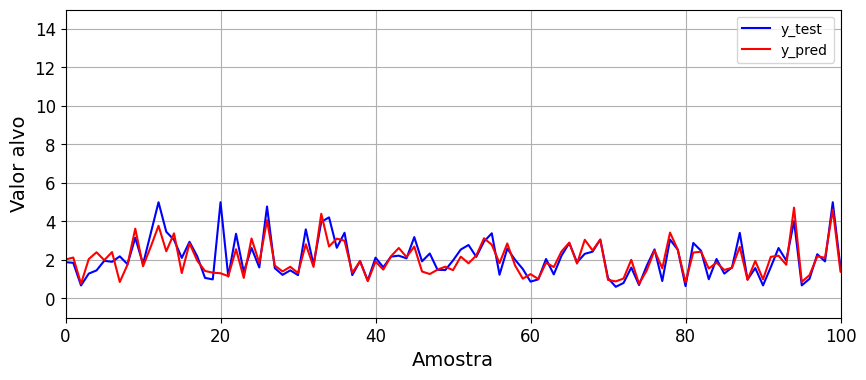

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

y_pred = keras_reg.predict(X_test)

plt.figure(figsize=(10, 4))
plt.grid(True)
plt.plot(range(0,len(y_test)),y_test, "b", label="y_test")
plt.plot(range(0,len(y_pred)),y_pred, "r", label="y_pred")
plt.axis([0, 100, -1, 15])
plt.xlabel("Amostra")
plt.ylabel("Valor alvo")
plt.legend()

plt.show()

##### Estrutura do modelo (salvar e carregar)

É possível conhecer a estrutura do modelo utilizando o `plot_model` do Keras.

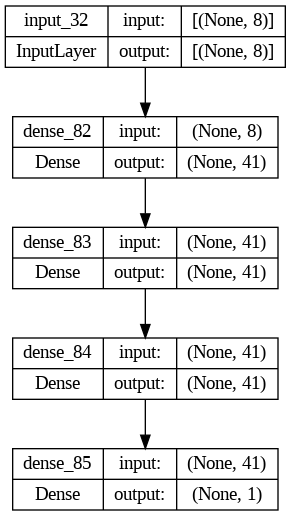

In [ ]:
model = rnd_search_cv.best_estimator_.model

from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

Depois de treinado, podemos salvar o modelo para carregar depois e utilizar em algum momento necessário.

In [ ]:
model.save("my_keras_model.h5")

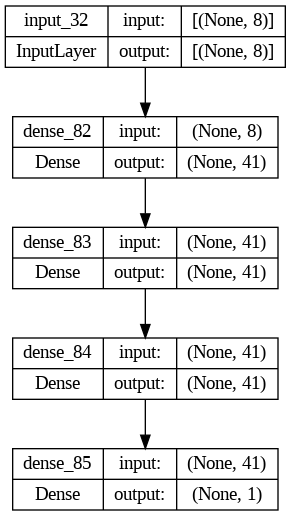

In [ ]:
model_loaded = keras.models.load_model("my_keras_model.h5")

from keras.utils.vis_utils import plot_model
plot_model(model_loaded, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

#### Função ajustar os hiperparâmetros do problema de classificação multiclasse

In [ ]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[28,28]):
  model = keras.models.Sequential()
  model.add(keras.layers.Flatten(input_shape=input_shape)) #camada de achatamento da matriz 28x28 da imagem
  for layer in range(n_hidden):
    model.add(keras.layers.Dense(n_neurons, activation='relu'))
  model.add(keras.layers.Dense(10, activation="softmax")) #camada de saida com 10 saidas e funcao softmax (calcula probabilidade da classe)

  optimizer = keras.optimizers.SGD(learning_rate=learning_rate)
  model.compile(loss='sparse_categorical_crossentropy',
                optimizer=optimizer,
                metrics=["accuracy"])
  model.summary()
  return model

Métodos para escolher a quantidade de neurônios na camada escondida.
- Método de Fletcher-Gloss: 2*sqrt(n) +n2 <= n1 <= 2*n+1
- Método de Kolmogorov: n1= 2*n+1